In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df = pd.read_parquet('../Data/parquet/australian_users_items.parquet')

In [3]:
df.head(5)

,item_id,item_name,playtime_2weeks,playtime_forever,items_count,steam_id,user_url
0,10,Counter-Strike,0,6,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...
1,20,Team Fortress Classic,0,0,888,76561198035864385,http://steamcommunity.com/id/js41637
2,30,Day of Defeat,0,7,137,76561198007712555,http://steamcommunity.com/id/evcentric
3,40,Deathmatch Classic,0,0,328,76561197963445855,http://steamcommunity.com/id/Riot-Punch
4,50,Half-Life: Opposing Force,0,0,541,76561198002099482,http://steamcommunity.com/id/doctr


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88310 entries, 0 to 88309
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   item_id           88176 non-null  object
 1   item_name         88176 non-null  object
 2   playtime_2weeks   88310 non-null  int64 
 3   playtime_forever  88310 non-null  int64 
 4   items_count       88310 non-null  int64 
 5   steam_id          88310 non-null  int64 
 6   user_url          88310 non-null  object
dtypes: int64(4), object(3)
memory usage: 5.4+ MB


In [4]:
df.isnull().sum()

item_id             134
item_name           134
playtime_2weeks       0
playtime_forever      0
items_count           0
steam_id              0
user_url              0
dtype: int64

In [8]:
df[['playtime_2weeks', 'playtime_forever', 'items_count']].describe()

,playtime_2weeks,playtime_forever,items_count
count,88310.000000,88310.000000,88310.000000
mean,23.763198,1332.117937,58.353629
std,267.371381,7048.898779,122.312095
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,3.000000
50%,0.000000,52.000000,26.000000
75%,0.000000,456.000000,73.000000
max,18126.000000,400827.000000,7762.000000


Las estadísticas descriptivas para las columnas 'playtime_2weeks', 'playtime_forever' y 'items_count' son las siguientes:

Para 'playtime_2weeks':

- El recuento de observaciones es 88,310.
- La media de tiempo de juego en las últimas dos semanas es de aproximadamente 23.76.
- La desviación estándar es grande (267.37), lo que indica una gran dispersión de los datos.
- El mínimo es 0, lo que sugiere que hay observaciones sin tiempo de juego en estas dos semanas.
- El 25% de los datos tienen un tiempo de juego en las últimas dos semanas igual a 0.
- La mediana es 0, y el 75% de los datos tienen un tiempo de juego igual a 0. Esto indica que la mayoría de las observaciones tienen poco o ningún tiempo de juego en estas dos semanas.
- El máximo registrado es de 18,126, lo que sugiere la presencia de algunos valores atípicos con un tiempo de juego notablemente alto.

Para 'playtime_forever':

- El recuento de observaciones es también 88,310.
- La media del tiempo de juego acumulado es de aproximadamente 1332.12.
- La desviación estándar es alta (7048.90), lo que indica una gran variabilidad en el tiempo de juego acumulado.
- El mínimo es 0, lo que significa que hay observaciones sin tiempo de juego acumulado.
- El 25% de los datos tienen un tiempo de juego acumulado igual a 0.
- La mediana es 52, lo que indica que la mitad de las observaciones tienen un tiempo de juego acumulado de 52 o menos.
- El 75% de los datos tienen un tiempo de juego acumulado de 456 o menos.
- El máximo es 400,827, lo que indica la presencia de valores atípicos con un tiempo de juego acumulado muy alto.

Para 'items_count':

- El recuento de observaciones es igualmente 88,310.
- La media de la cantidad de elementos es de aproximadamente 58.35.
- La desviación estándar es 122.31, indicando variabilidad en la cantidad de elementos.
- El mínimo es 0, lo que sugiere observaciones sin elementos.
- El 25% de los datos tienen 3 elementos o menos.
- La mediana es 26, lo que indica que la mitad de las observaciones tienen 26 elementos o menos.
- El 75% de los datos tienen 73 elementos o menos.
- El máximo es 7,762, lo que sugiere la presencia de valores atípicos con una gran cantidad de elementos.


In [14]:
column_to_check = 'playtime_forever'
z_scores = stats.zscore(df[column_to_check])

# Establecer un umbral para considerar valores atípicos (por ejemplo, z-score > 3)
threshold = 3
outlier_indices = np.where(z_scores > threshold)

outliers = df.iloc[outlier_indices]
print("Valores atípicos:")
print(outliers)

Valores atípicos:
      item_id                         item_name  playtime_2weeks  \
178       730  Counter-Strike: Global Offensive                0   
1301   466170           Idling to Rule the Gods             1554   
1354    12210               Grand Theft Auto IV                0   
1361    21660                 Street Fighter IV                0   
2277      730  Counter-Strike: Global Offensive              118   
...       ...                               ...              ...   
87871  252490                              Rust              147   
88007  218620                          PAYDAY 2                0   
88181    4000                       Garry's Mod              118   
88282    8930        Sid Meier's Civilization V                0   
88285  105600                          Terraria               30   

       playtime_forever  items_count           steam_id  \
178               23532           27  76561198027947401   
1301              28545           46  765611980

- Counter-Strike: Global Offensive: Este juego muestra un tiempo de juego bastante alto (playtime_forever = 23532). Podría ser una observación válida, ya que es un juego popular y es posible que algunos jugadores hayan dedicado mucho tiempo a él.

- Idling to Rule the Gods: Otro juego con un tiempo de juego significativamente alto (playtime_forever = 28545). Al igual que el anterior, puede haber jugadores que hayan invertido una gran cantidad de tiempo en este juego.

- Grand Theft Auto IV: Este juego también muestra un tiempo de juego muy alto (playtime_forever = 52062). Es un juego conocido y es posible que algunos jugadores hayan pasado muchas horas jugando.

- Rust: Este juego tiene un tiempo de juego (playtime_forever = 26913) que lo coloca entre los valores atípicos detectados.
 
- PAYDAY 2: Otro juego con un tiempo de juego (playtime_forever = 26602) que lo coloca entre los valores atípicos.
 
- Garry's Mod: Presenta un tiempo de juego (playtime_forever = 37339) considerablemente alto.

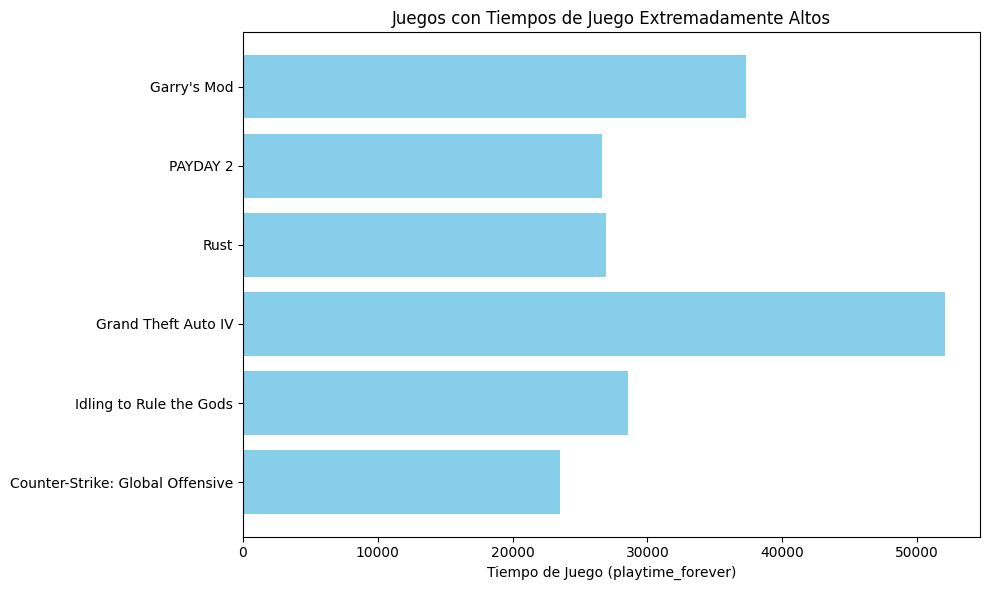

In [16]:
juegos = [
    'Counter-Strike: Global Offensive',
    'Idling to Rule the Gods',
    'Grand Theft Auto IV',
    'Rust',
    'PAYDAY 2',
    'Garry\'s Mod'
]

tiempos = [
    23532,
    28545,
    52062,
    26913,
    26602,
    37339
]

plt.figure(figsize=(10, 6))

plt.barh(juegos, tiempos, color='skyblue')
plt.xlabel('Tiempo de Juego (playtime_forever)')
plt.title('Juegos con Tiempos de Juego Extremadamente Altos')

plt.tight_layout()
plt.show()

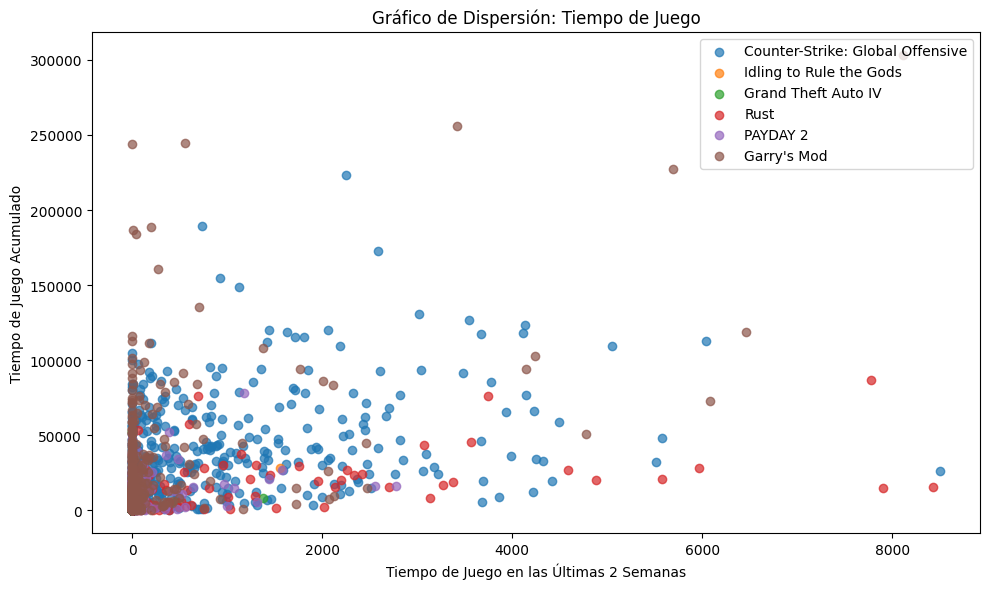

In [18]:
juegos_atipicos = [
    'Counter-Strike: Global Offensive',
    'Idling to Rule the Gods',
    'Grand Theft Auto IV',
    'Rust',
    'PAYDAY 2',
    'Garry\'s Mod'
]

plt.figure(figsize=(10, 6))

for juego in juegos_atipicos:
    data = df[df['item_name'] == juego]
    plt.scatter(data['playtime_2weeks'], data['playtime_forever'], label=juego, alpha=0.7)

plt.xlabel('Tiempo de Juego en las Últimas 2 Semanas')
plt.ylabel('Tiempo de Juego Acumulado')
plt.title('Gráfico de Dispersión: Tiempo de Juego')

plt.legend()
plt.tight_layout()
plt.show()